In [1]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
df = pd.DataFrame(cancer.data[:,0:2], columns=cancer.feature_names[0:2])

df['class'] = cancer.target

df.head

<bound method NDFrame.head of      mean radius  mean texture  class
0          17.99         10.38      0
1          20.57         17.77      0
2          19.69         21.25      0
3          11.42         20.38      0
4          20.29         14.34      0
..           ...           ...    ...
564        21.56         22.39      0
565        20.13         28.25      0
566        16.60         28.08      0
567        20.60         29.33      0
568         7.76         24.54      1

[569 rows x 3 columns]>

In [4]:
x = df.drop('class' ,axis=1)

y = df['class']

<h3>Feature Scaling</h3>

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_sc = sc.fit_transform(x)

<Axes: title={'center': 'Before Scaling (Raw Data)'}, xlabel='mean radius', ylabel='Density'>

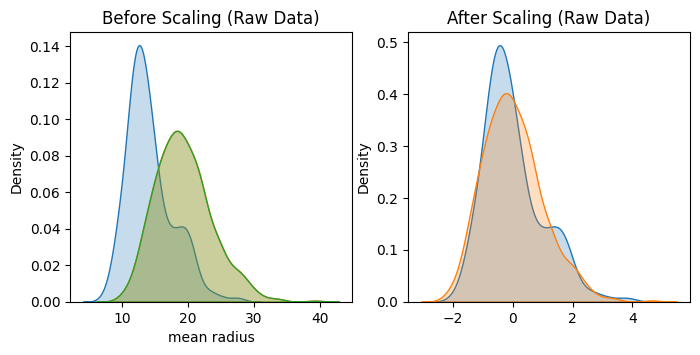

In [6]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 3.5))

ax1.set_title("Before Scaling (Raw Data)")
sns.kdeplot(df['mean radius'], fill=True, ax=ax1)
sns.kdeplot(df['mean texture'], fill=True, ax=ax1)

ax2.set_title("After Scaling (Raw Data)")
sns.kdeplot(x_sc[:, 0], fill=True, ax=ax2)
sns.kdeplot(x_sc[:, 1], fill=True, ax=ax2)
sns.kdeplot(df['mean texture'], fill=True, ax=ax1)

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_sc, y, test_size=0.25, random_state=20)

len(x_train), len(x_test)

(426, 143)

In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input

In [9]:
input_size = x_train.shape[-1]
input_size

2

<h3>Create Model</h3>

In [10]:
model = Sequential()

model.add(Input(shape=(input_size,)))

model.add(Dense(128, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

<h3>Model Info</h3>

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 513 (2.00 KB)
Trainable params: 513 (2.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model.output_shape

(None, 1)

In [13]:
model.get_config()

{'name': 'sequential',
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 2),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_1'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'units': 128,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'registered_name': None,
   'build_config': {'input_shape': (None, 2)}},
  {'module': 'kera

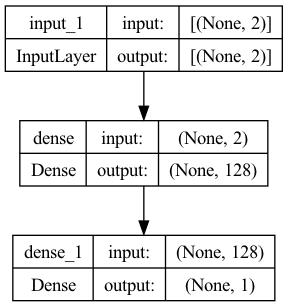

In [14]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)

<h3>Complie</h3>

In [15]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [16]:
import time

start = time.time()

history = model.fit(x_train, y_train, epochs=40, verbose=1, batch_size=32, validation_split=0.25)

end = time.time()

print(f'time taken {end-start:.3f} sce')

Epoch 1/40
10/10 [==============================] - 0s 9ms/step - loss: 0.6459 - accuracy: 0.8088 - val_loss: 0.5929 - val_accuracy: 0.8879
Epoch 2/40
10/10 [==============================] - 0s 2ms/step - loss: 0.5809 - accuracy: 0.8464 - val_loss: 0.5276 - val_accuracy: 0.9159
Epoch 3/40
10/10 [==============================] - 0s 2ms/step - loss: 0.5242 - accuracy: 0.8527 - val_loss: 0.4736 - val_accuracy: 0.9065
Epoch 4/40
10/10 [==============================] - 0s 2ms/step - loss: 0.4781 - accuracy: 0.8652 - val_loss: 0.4274 - val_accuracy: 0.9065
Epoch 5/40
10/10 [==============================] - 0s 2ms/step - loss: 0.4387 - accuracy: 0.8809 - val_loss: 0.3894 - val_accuracy: 0.9159
Epoch 6/40
10/10 [==============================] - 0s 2ms/step - loss: 0.4048 - accuracy: 0.8840 - val_loss: 0.3574 - val_accuracy: 0.9159
Epoch 7/40
10/10 [==============================] - 0s 2ms/step - loss: 0.3769 - accuracy: 0.8934 - val_loss: 0.3310 - val_accuracy: 0.9065
Epoch 8/40
10/10 [==

<h3>Loss and Accuracy Curve</h3>

In [17]:
history.params

{'verbose': 1, 'epochs': 40, 'steps': 10}

In [18]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 1.0, 'Loss Cruve')

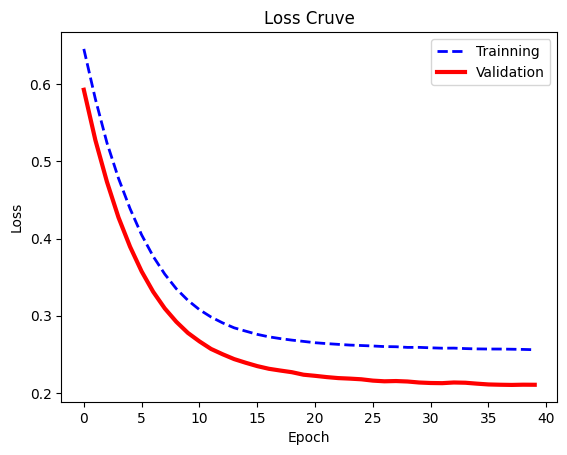

In [19]:
plt.plot(history.history['loss'], '--', c='b', lw=2, label='Trainning')
plt.plot(history.history['val_loss'], c='r', lw=3, label='Validation')

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()
plt.title('Loss Cruve')

Text(0.5, 1.0, 'Accuracy Cruve')

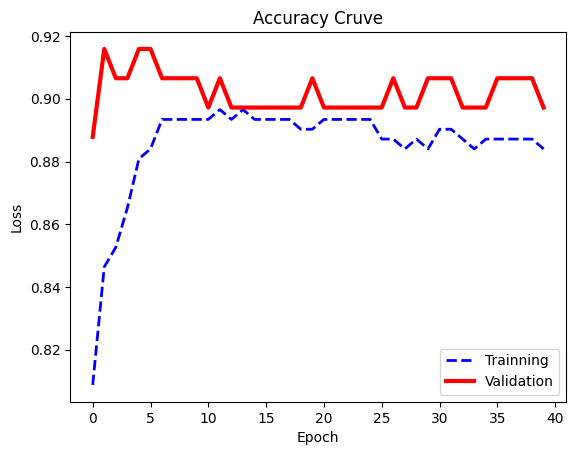

In [20]:
plt.plot(history.history['accuracy'], '--', c='b', lw=2, label='Trainning')
plt.plot(history.history['val_accuracy'], c='r', lw=3, label='Validation')

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()
plt.title('Accuracy Cruve')

Text(0.5, 1.0, 'Accuracy Cruve')

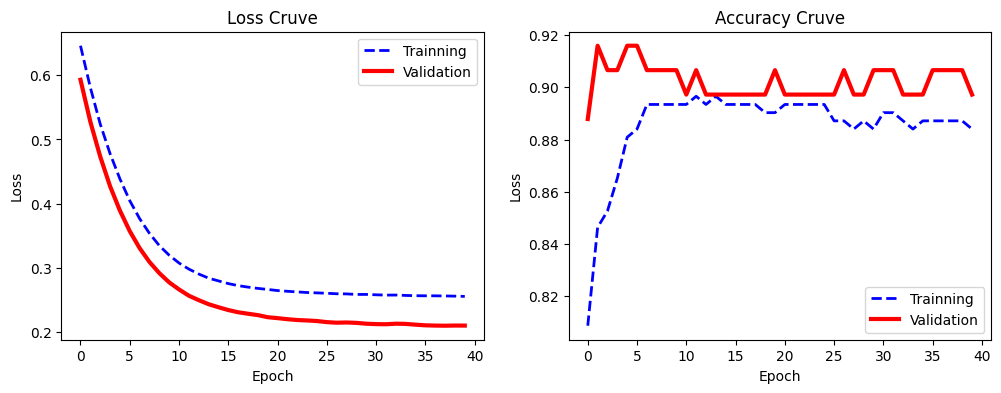

In [21]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], '--', c='b', lw=2, label='Trainning')
plt.plot(history.history['val_loss'], c='r', lw=3, label='Validation')

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()
plt.title('Loss Cruve')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], '--', c='b', lw=2, label='Trainning')
plt.plot(history.history['val_accuracy'], c='r', lw=3, label='Validation')

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()
plt.title('Accuracy Cruve')


<h3>Evaluate</h3>

In [22]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss : ",score[0])
print(f"Test accuracy : {score[1]:.4f}")

Test loss :  0.2196408361196518
Test accuracy : 0.9161


In [23]:
y_pred_pr = model.predict(x_test)

y_pred_pr

5/5 [==============================] - 0s 524us/step


array([[9.61171985e-01],
       [2.00322494e-01],
       [1.07108625e-02],
       [8.44461739e-01],
       [4.11709160e-01],
       [1.50954793e-03],
       [4.18326892e-02],
       [9.30064857e-01],
       [9.89972770e-01],
       [2.11078601e-04],
       [3.50357369e-02],
       [9.50807214e-01],
       [8.90926301e-01],
       [3.65128592e-02],
       [9.27814245e-01],
       [9.78902638e-01],
       [9.87756550e-01],
       [3.16287614e-02],
       [2.86624312e-01],
       [9.96868372e-01],
       [9.43944395e-01],
       [9.97980833e-01],
       [2.19718546e-01],
       [3.65238547e-01],
       [4.41345805e-03],
       [9.53942910e-02],
       [9.40318704e-01],
       [9.22721505e-01],
       [4.24846858e-01],
       [9.53187764e-01],
       [3.14988345e-01],
       [9.58302200e-01],
       [2.00380338e-03],
       [9.79314506e-01],
       [3.18496302e-02],
       [2.91317818e-03],
       [3.26551050e-02],
       [9.67442870e-01],
       [8.73578861e-02],
       [9.67636168e-01],


In [24]:
y_pred = (y_pred_pr > 0.5).astype(int)

y_pred[:4]

array([[1],
       [0],
       [0],
       [1]])

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

print('Score -> {}'.format(score[1]))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Score -> 0.9160839319229126
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        57
           1       0.93      0.93      0.93        86

    accuracy                           0.92       143
   macro avg       0.91      0.91      0.91       143
weighted avg       0.92      0.92      0.92       143

[[51  6]
 [ 6 80]]


Text(0.5, 1.0, 'Confusion Matrix')

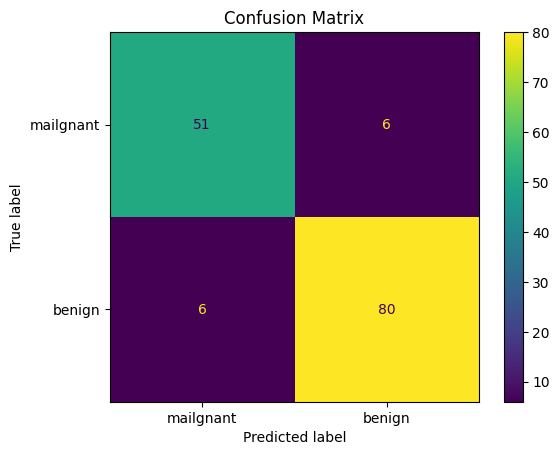

In [26]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

class_names = ['mailgnant', 'benign']

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=class_names).plot()
plt.title('Confusion Matrix')

<h3>Decision Regions</h3>

9600/9600 [==============================] - 3s 274us/step


Text(0, 0.5, 'mean texture')

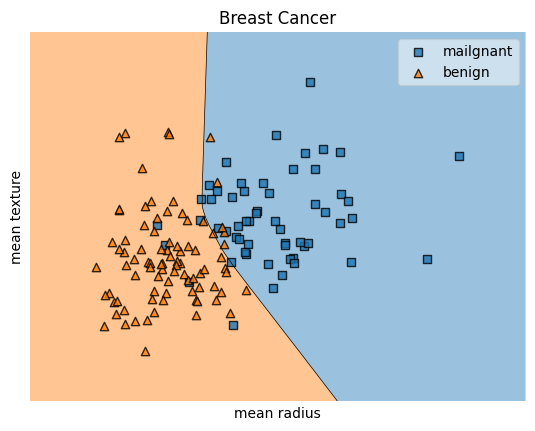

In [27]:
from mlxtend.plotting import plot_decision_regions

ax = plot_decision_regions(x_test, np.array(y_test), clf=model)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=0.5)

plt.title("Breast Cancer")
plt.xticks([])
plt.yticks([])
plt.xlabel('mean radius')
plt.ylabel('mean texture')

<h3>Prediction</h3>

In [28]:
x_new = [[16.4, 14.1],
         [18.5, 15.1]]

x_new_sc = sc.transform(x_new)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [29]:
y_pred_pr = model.predict(x_new_sc)
y_pred_pr

1/1 [==============================] - 0s 10ms/step


array([[0.6061122 ],
       [0.09991673]], dtype=float32)

In [30]:
y_pred = (y_pred_pr > 0.5).astype(int)

y_pred[:4]

array([[1],
       [0]])

In [31]:
y_pred = y_pred.reshape(1, -1)[0]
y_pred

array([1, 0])

In [32]:
print(class_names[y_pred[0]])

benign


<h3>Tensor Board</h3>

In [33]:
from keras.callbacks import TensorBoard

history = model.fit(x_train, y_train, epochs=40, verbose=0, batch_size=32, validation_split=0.25,
                    callbacks=[TensorBoard(log_dir='./log')])